# Exploring and Analyzing US Unemployment Data.

The goal of this project is to explore and analyze the US unemployment data from 1948-2021 from data that contains monthly unemployment rates in the US from 1948-2021.

**Purpose of the project.

The purpose of this project is to answer the following questions.
1) In what year(s) has unemployment rates been the highest?
2) Is there a difference in unemployment rates between men and women?
3) What is the relationship between age and unemployment?

**Data Source.

The original data was gotten from the US Bureau of Labor Statistics. This data is also available on Kaggle https://www.kaggle.com/datasets/tunguz/us-monthly-unemployment-rate-1948-present



In [1]:
# Tools for data anlysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Needed for plots to appear in notebook
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


**Load Data

In [2]:
#Load the dataset
unemp =pd.read_csv('C:\\Users\\cdona\\Downloads\\unemployment.csv')
unemp.head()

,date,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over
0,1/1/1948,4.0,4.2,3.5,10.8,9.6,6.6,3.6,2.6,2.7,3.6
1,2/1/1948,4.7,4.7,4.8,15.0,9.5,8.0,4.0,3.2,3.4,4.0
2,3/1/1948,4.5,4.5,4.4,13.2,9.3,8.6,3.5,3.2,2.9,3.5
3,4/1/1948,4.0,4.0,4.1,9.9,8.1,6.8,3.5,3.1,2.9,3.2
4,5/1/1948,3.4,3.3,3.4,6.4,7.2,6.3,2.8,2.5,2.3,2.9


In [3]:
unemp.shape

(887, 11)

In [4]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             887 non-null    object 
 1   unrate           887 non-null    float64
 2   unrate_men       887 non-null    float64
 3   unrate_women     887 non-null    float64
 4   unrate_16_to_17  887 non-null    float64
 5   unrate_18_to_19  887 non-null    float64
 6   unrate_20_to_24  887 non-null    float64
 7   unrate_25_to_34  887 non-null    float64
 8   unrate_35_to_44  887 non-null    float64
 9   unrate_45_to_54  887 non-null    float64
 10  unrate_55_over   887 non-null    float64
dtypes: float64(10), object(1)
memory usage: 76.4+ KB


In [5]:
unemp["date"]=pd.to_datetime(unemp["date"])
unemp.describe

<bound method NDFrame.describe of           date  unrate  unrate_men  unrate_women  unrate_16_to_17  \
0   1948-01-01     4.0         4.2           3.5             10.8   
1   1948-02-01     4.7         4.7           4.8             15.0   
2   1948-03-01     4.5         4.5           4.4             13.2   
3   1948-04-01     4.0         4.0           4.1              9.9   
4   1948-05-01     3.4         3.3           3.4              6.4   
..         ...     ...         ...           ...              ...   
882 2021-07-01     5.7         5.5           5.8             12.8   
883 2021-08-01     5.3         5.1           5.5             10.7   
884 2021-09-01     4.6         4.6           4.5              9.2   
885 2021-10-01     4.3         4.2           4.4              8.6   
886 2021-11-01     3.9         3.9           3.9              9.7   

     unrate_18_to_19  unrate_20_to_24  unrate_25_to_34  unrate_35_to_44  \
0                9.6              6.6              3.6        

In [6]:
#checking null value 
unemp.isna().sum()

date               0
unrate             0
unrate_men         0
unrate_women       0
unrate_16_to_17    0
unrate_18_to_19    0
unrate_20_to_24    0
unrate_25_to_34    0
unrate_35_to_44    0
unrate_45_to_54    0
unrate_55_over     0
dtype: int64

In [7]:
# look  describe data set
unemp.describe().round(2)

,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over
count,887.00,887.00,887.00,887.00,887.00,887.00,887.00,887.00,887.00,887.00
mean,5.76,5.63,6.03,17.94,14.82,9.35,5.53,4.24,3.87,3.84
std,1.74,1.95,1.61,5.02,4.05,2.80,1.92,1.44,1.35,1.24
min,2.40,1.90,2.60,5.70,5.20,3.30,2.00,1.60,1.50,1.50
25%,4.50,4.30,4.90,14.70,12.30,7.70,4.20,3.20,2.95,3.00
50%,5.50,5.30,5.80,17.80,14.60,9.10,5.20,4.00,3.60,3.60
75%,6.80,6.70,7.00,20.90,17.00,10.80,6.70,5.00,4.50,4.40
max,14.40,13.30,15.70,35.80,33.30,25.00,14.30,11.30,12.10,13.40


**Trends in unemployment rates.

<AxesSubplot:xlabel='date', ylabel='unrate'>

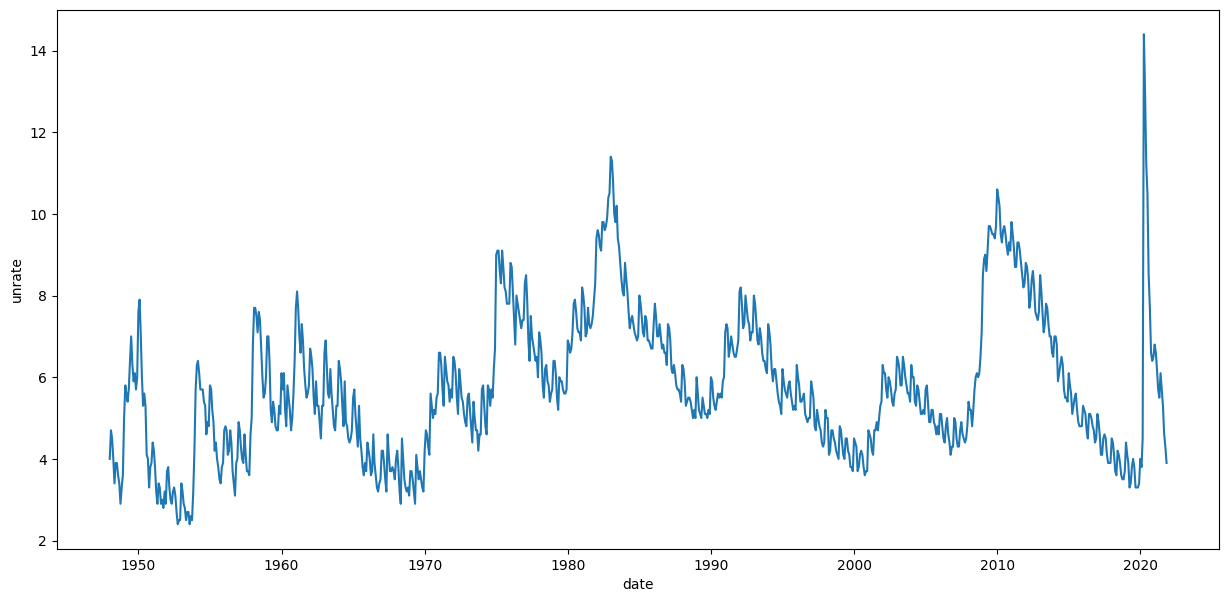

In [8]:
# show unemployment rates across the years
plt.figure(figsize=(15,7))
sns.lineplot(data=unemp , x="date",y="unrate")

**Unemployment rates for women and men.

<AxesSubplot:xlabel='date', ylabel='unrate_women'>

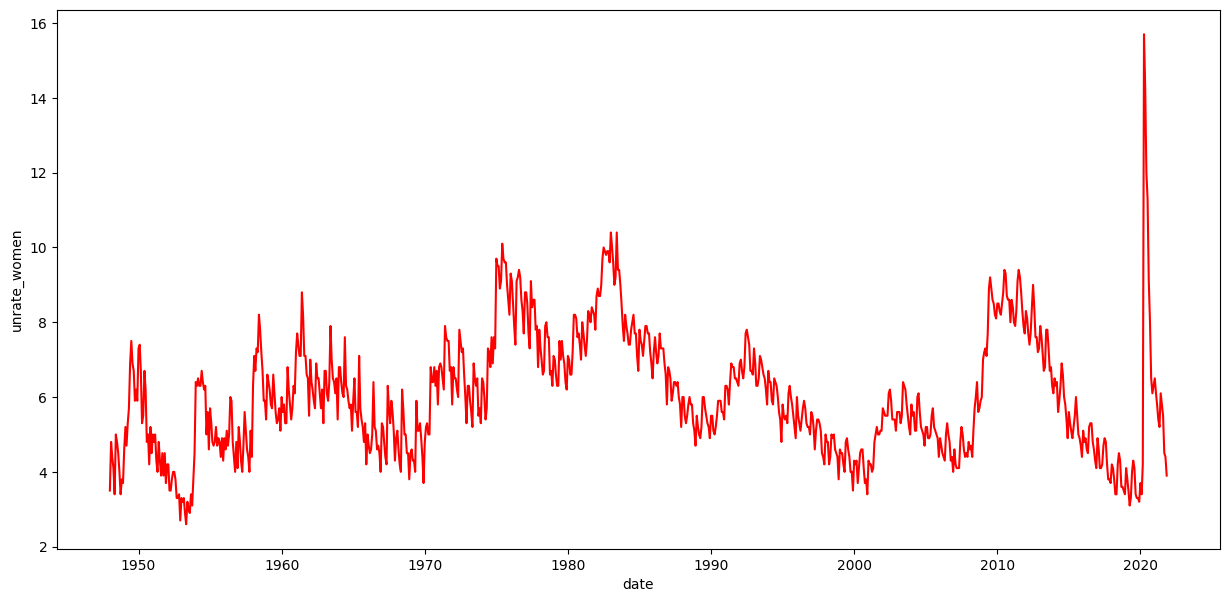

In [9]:
# show unemployment rates for women
plt.figure(figsize=(15,7))
sns.lineplot(data=unemp , x='date',y='unrate_women', color='red')

<AxesSubplot:xlabel='date', ylabel='unrate_men'>

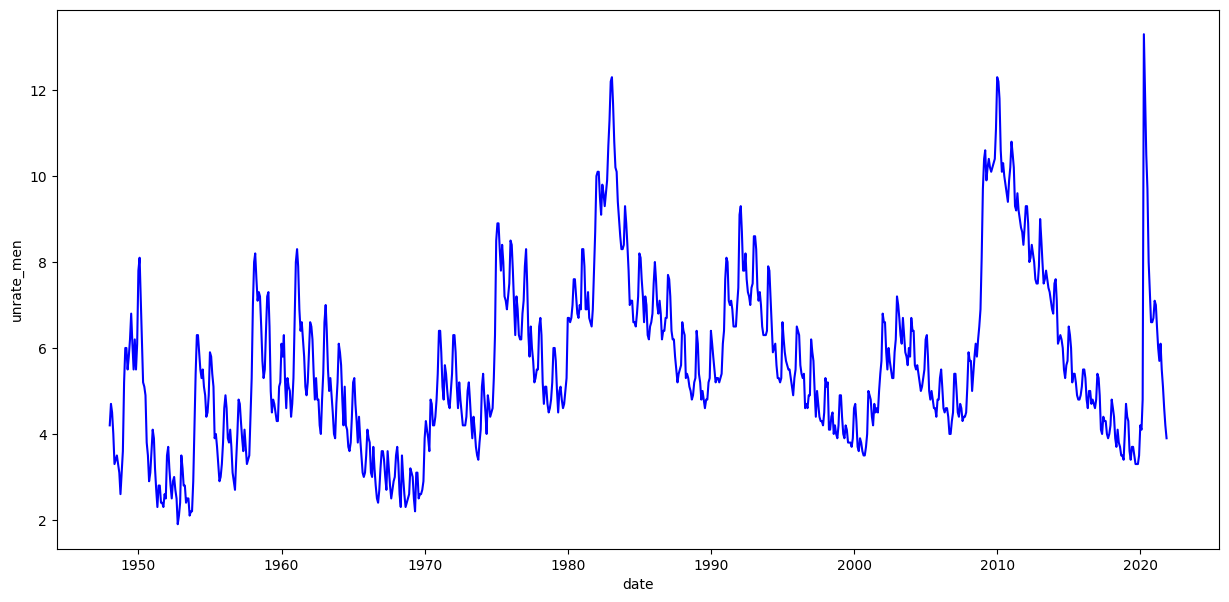

In [11]:
# show unemployment rates for men
plt.figure(figsize=(15,7))
sns.lineplot(data=unemp , x='date',y='unrate_men', color='blue')

<function matplotlib.pyplot.legend(*args, **kwargs)>

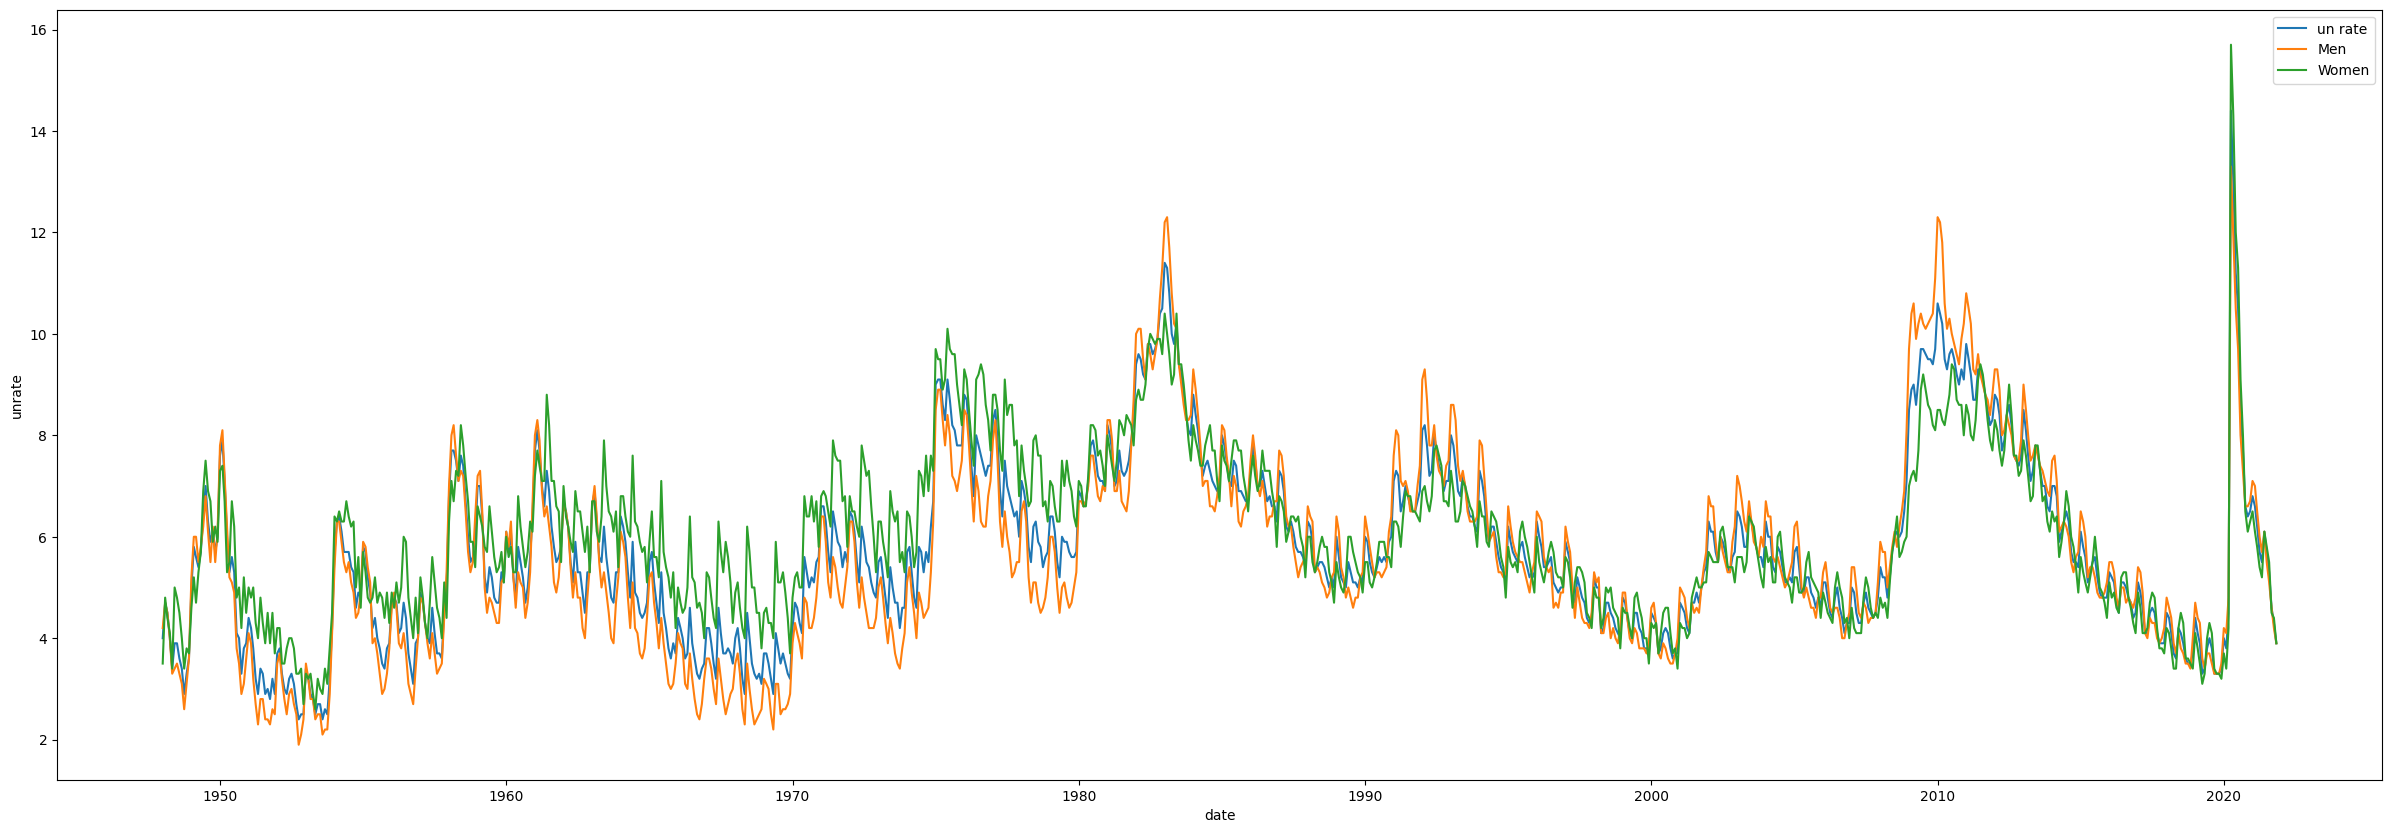

In [12]:
#  show unemployment rates
 
plt.figure(figsize=(30,10))
sns.lineplot(data=unemp,x="date",y="unrate",label="un rate")
sns.lineplot(data=unemp,x="date",y="unrate_men",label="Men")
sns.lineplot(data=unemp,x="date",y="unrate_women",label="Women")

plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

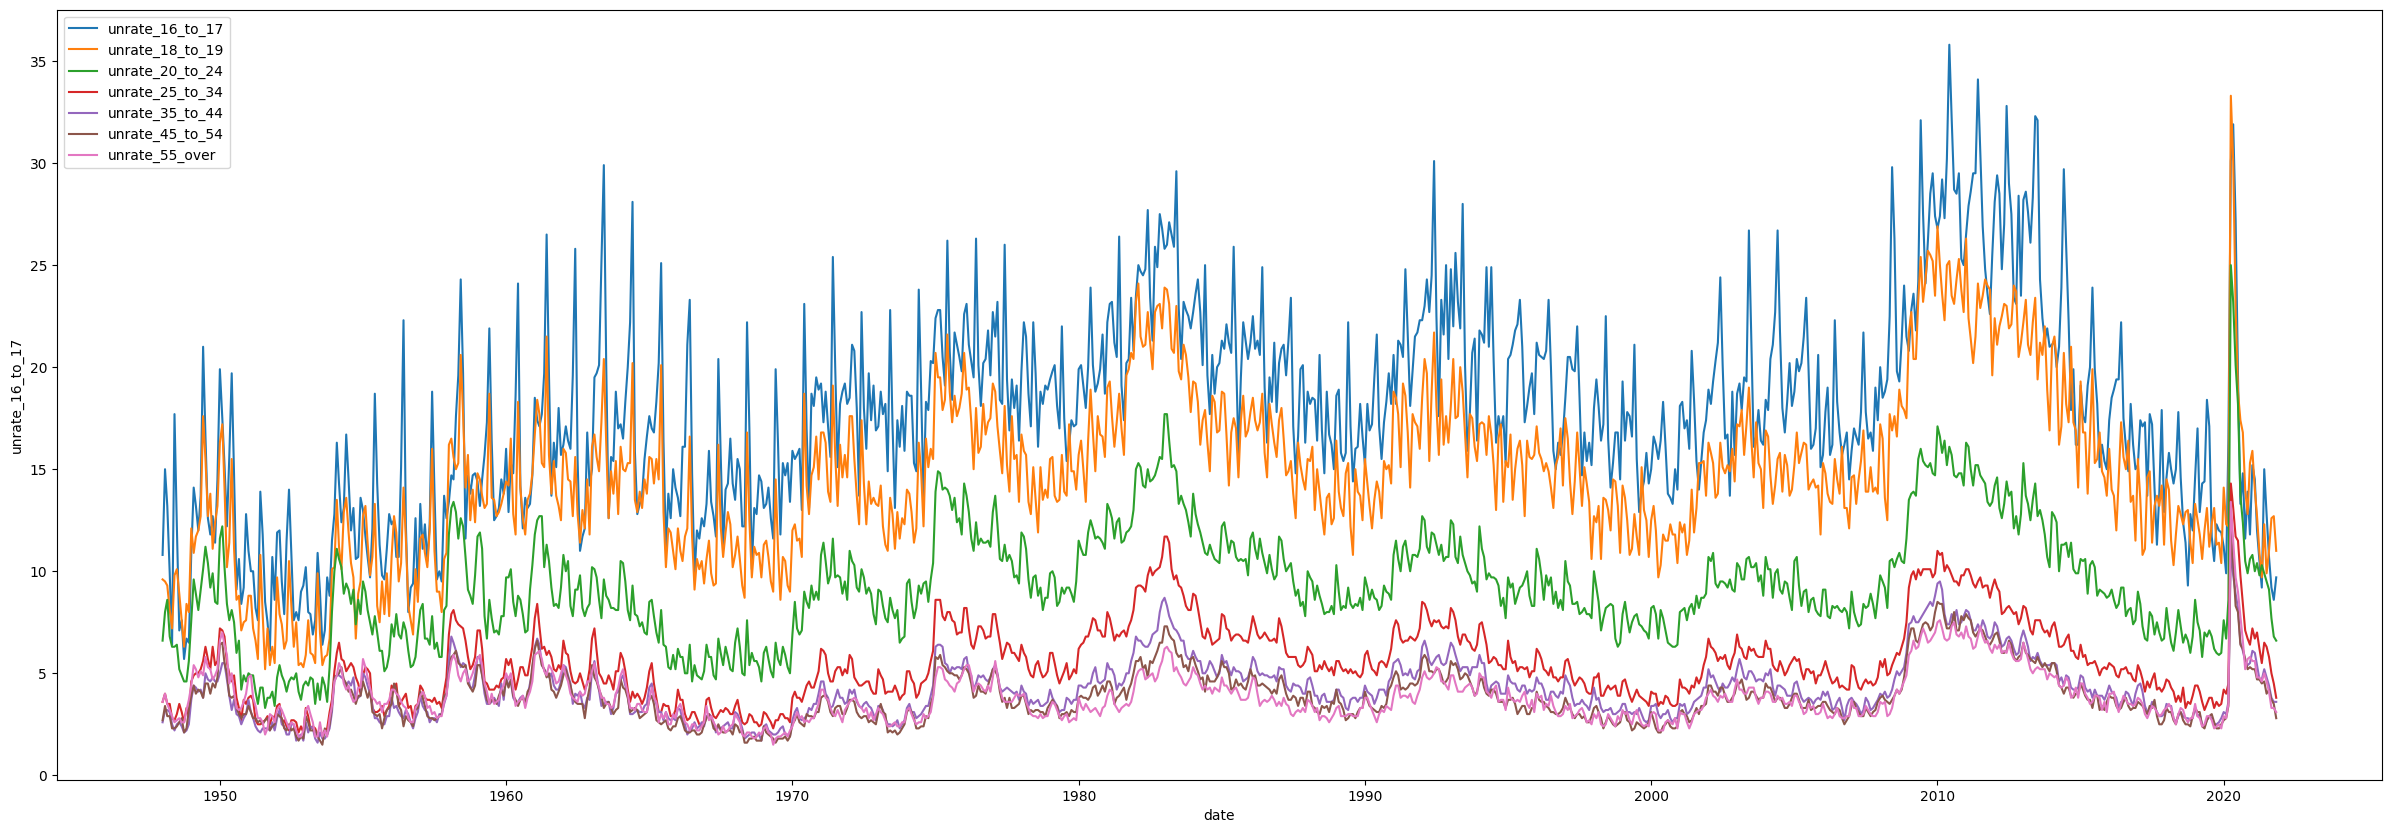

In [13]:
# show unemployment categories
plt.figure(figsize=(30,10))
sns.lineplot(data=unemp,x="date",y="unrate_16_to_17",label="unrate_16_to_17")
sns.lineplot(data=unemp,x="date",y="unrate_18_to_19",label="unrate_18_to_19")
sns.lineplot(data=unemp,x="date",y="unrate_20_to_24",label="unrate_20_to_24")
sns.lineplot(data=unemp,x="date",y="unrate_25_to_34",label="unrate_25_to_34")
sns.lineplot(data=unemp,x="date",y="unrate_35_to_44",label="unrate_35_to_44")
sns.lineplot(data=unemp,x="date",y="unrate_45_to_54",label="unrate_45_to_54")
sns.lineplot(data=unemp,x="date",y="unrate_55_over",label="unrate_55_over")

plt.legend


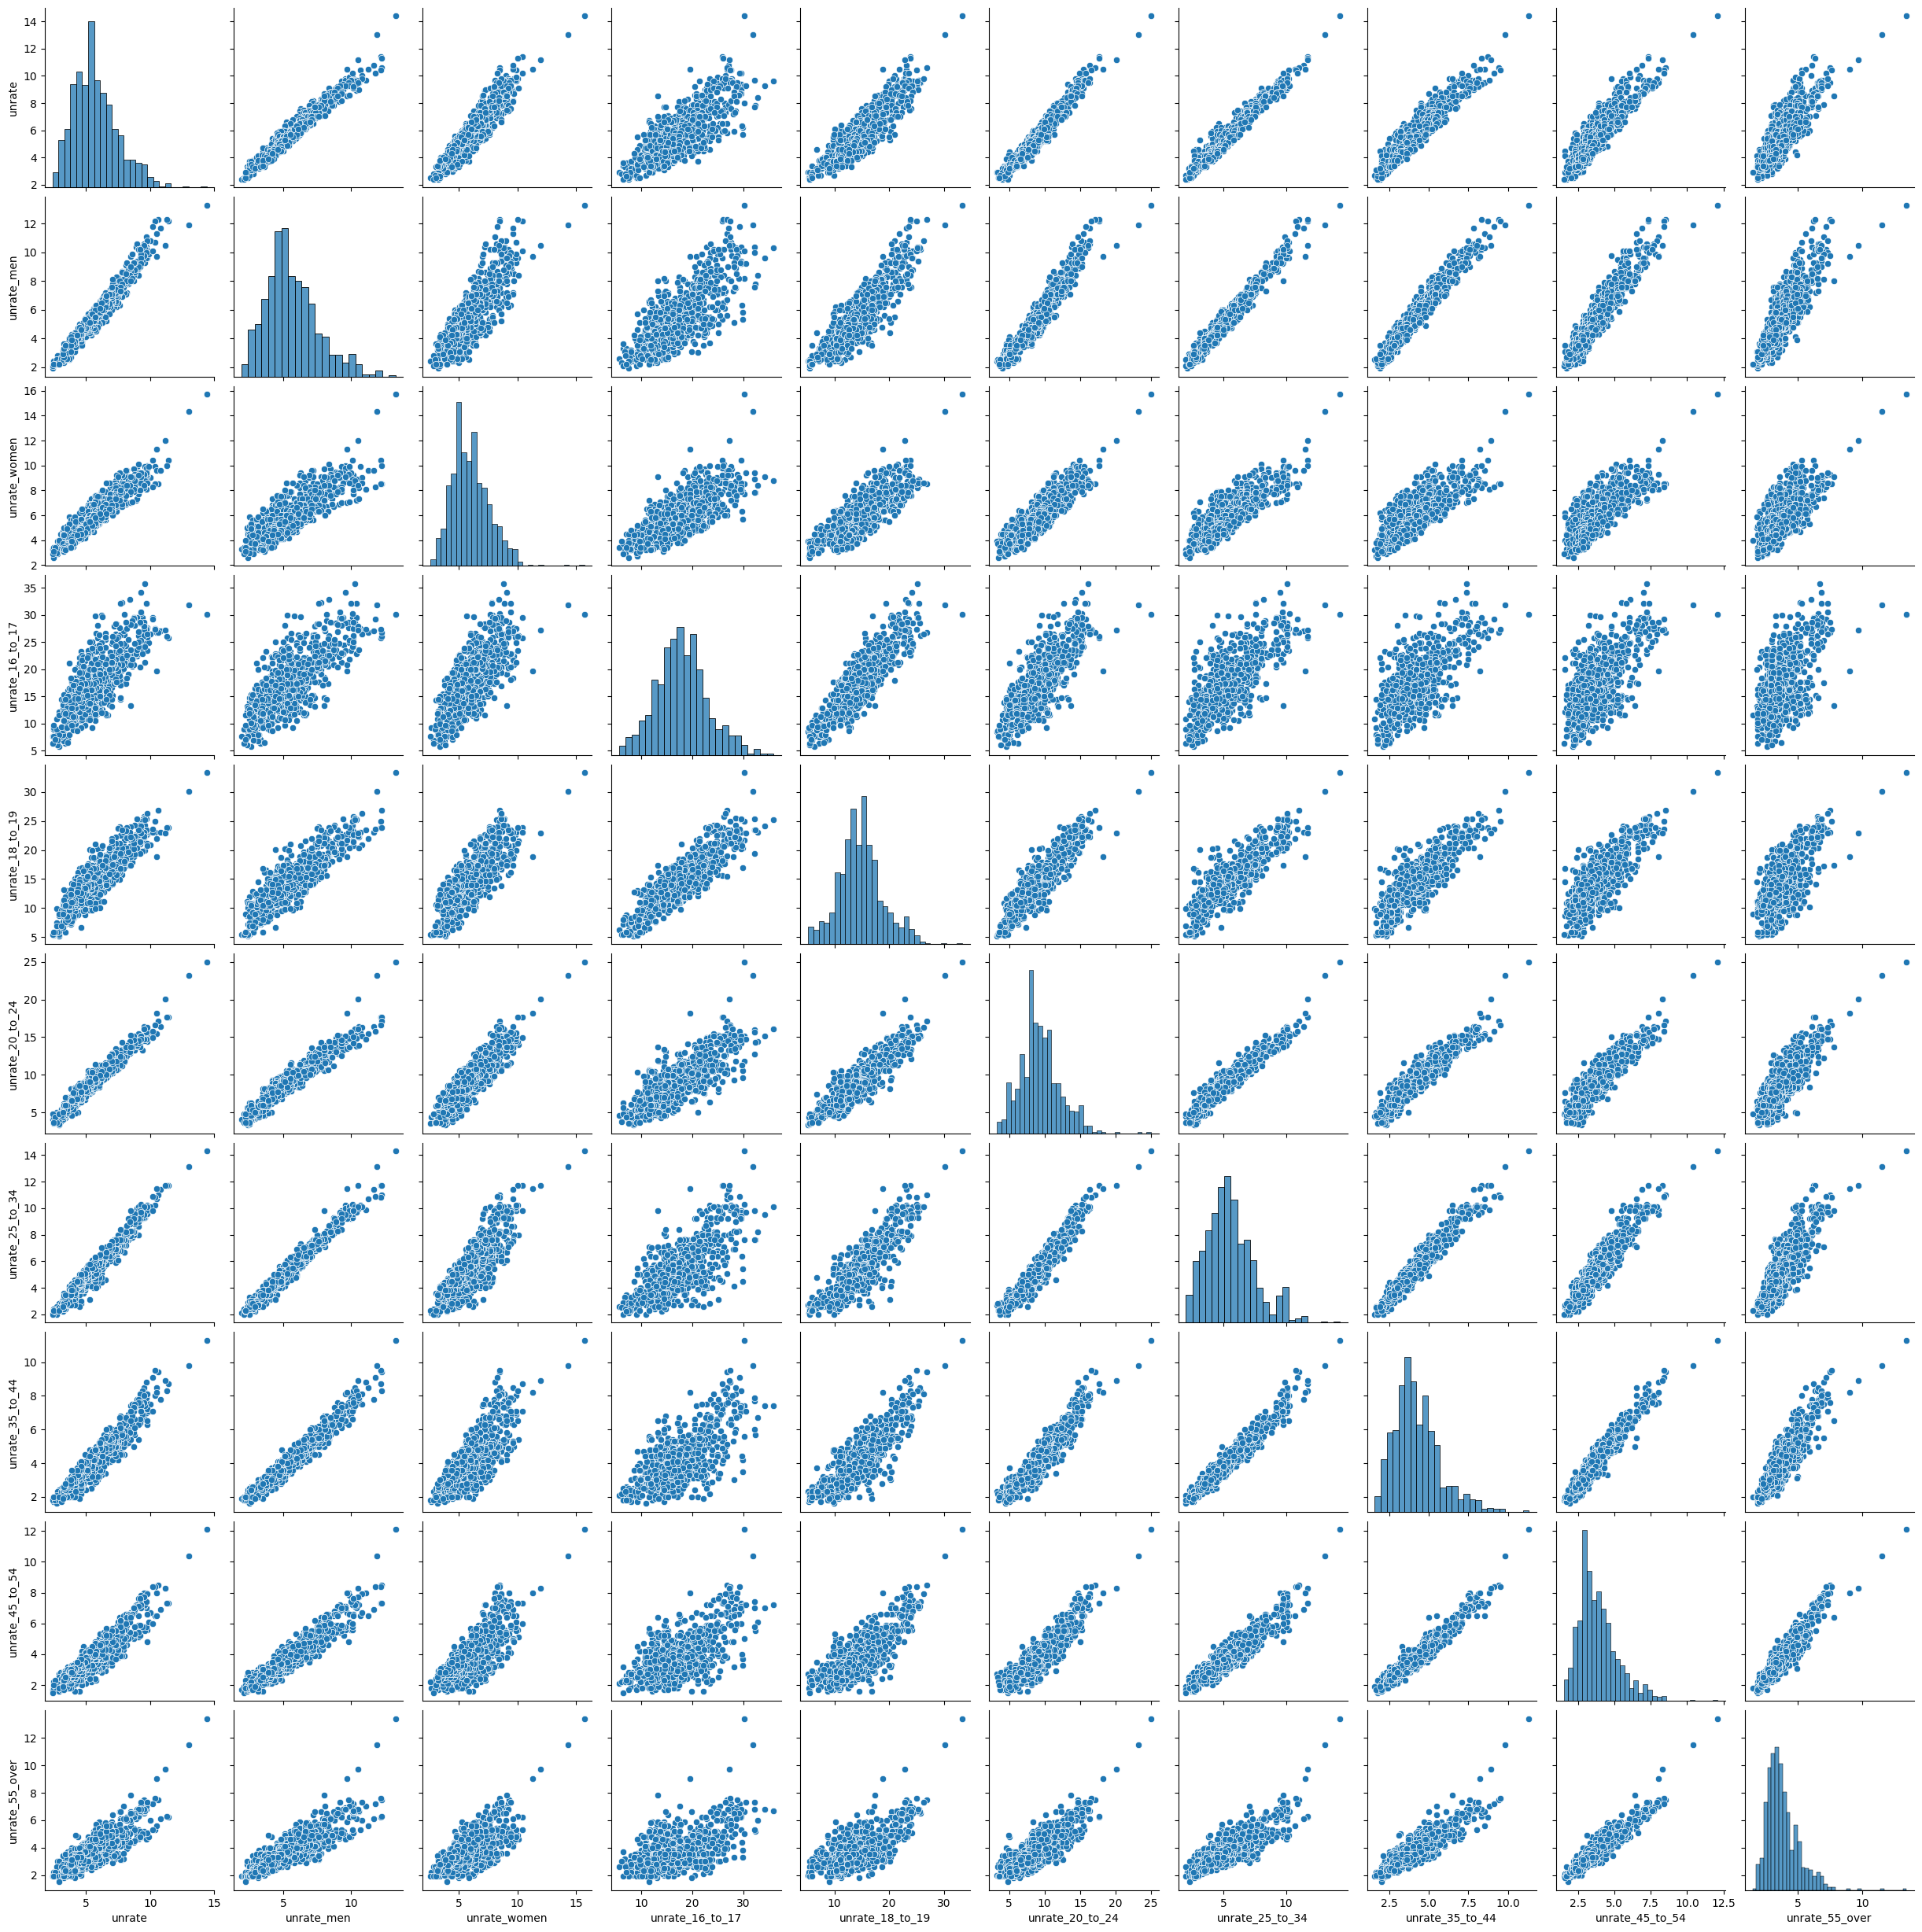

In [14]:
sns.pairplot(unemp)

In [15]:
unemp['Year']= unemp['date'].dt.year
avg_year=unemp.groupby("Year")["unrate","unrate_men","unrate_women"].mean().round(2)
avg_year

C:\Users\cdona\AppData\Local\Temp\ipykernel_2840\3389029956.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_year=unemp.groupby("Year")["unrate","unrate_men","unrate_women"].mean().round(2)


,unrate,unrate_men,unrate_women
Year,,,
1948,3.77,3.61,4.12
1949,5.91,5.91,5.96
1950,5.32,5.12,5.73
1951,3.33,2.83,4.39
1952,3.03,2.77,3.64
...,...,...,...
2017,4.35,4.40,4.32
2018,3.90,3.95,3.83
2019,3.67,3.72,3.62


<AxesSubplot:xlabel='Year'>

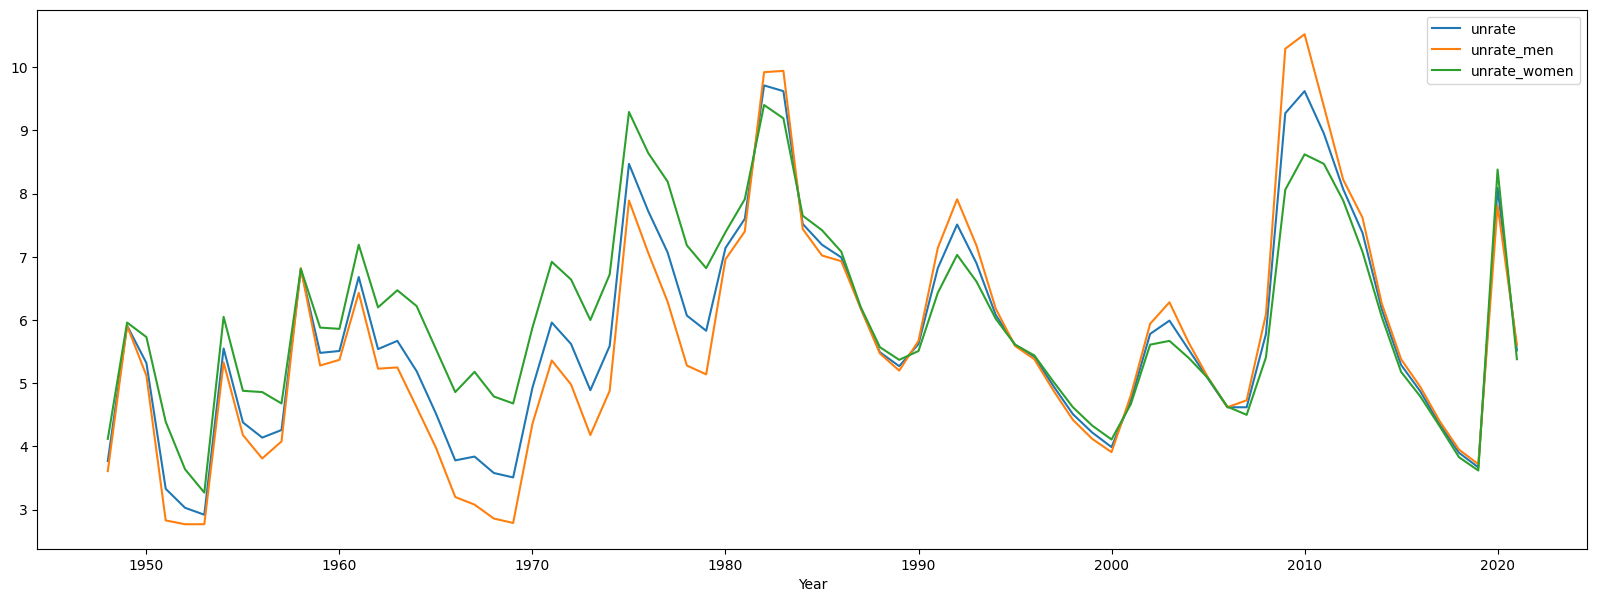

In [16]:
avg_year.plot(figsize=(20,7))

**Unemployment rates by age group.

In [17]:
avg_cat=unemp.groupby("Year")["unrate_16_to_17","unrate_18_to_19","unrate_20_to_24","unrate_25_to_34","unrate_35_to_44","unrate_45_to_54","unrate_55_over"].mean().round(2)
avg_cat

C:\Users\cdona\AppData\Local\Temp\ipykernel_2840\186062235.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_cat=unemp.groupby("Year")["unrate_16_to_17","unrate_18_to_19","unrate_20_to_24","unrate_25_to_34","unrate_35_to_44","unrate_45_to_54","unrate_55_over"].mean().round(2)


,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over
Year,,,,,,,
1948,9.90,8.57,6.16,3.21,2.59,2.66,3.12
1949,13.71,12.98,9.25,5.40,4.40,4.25,5.08
1950,13.74,11.28,7.66,4.84,3.81,4.18,4.74
1951,9.49,7.12,4.12,2.96,2.52,2.71,3.16
1952,9.93,7.22,4.59,2.62,2.27,2.29,2.58
...,...,...,...,...,...,...,...
2017,15.47,13.12,7.38,4.57,3.47,3.14,3.23
2018,13.75,12.34,6.93,3.95,2.98,2.82,2.99
2019,13.92,11.92,6.73,3.72,2.74,2.71,2.68


<AxesSubplot:xlabel='Year'>

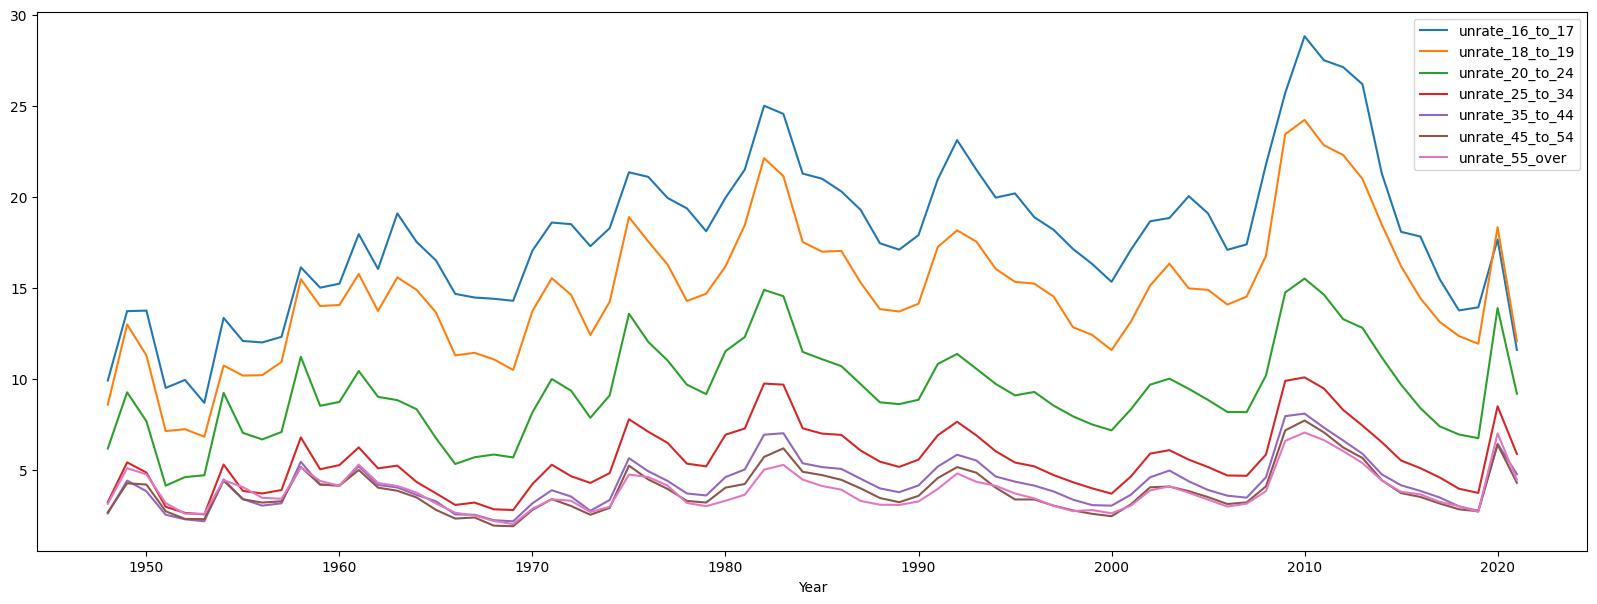

In [18]:
avg_cat.plot(figsize=(20,7))

**Discussion of findings.
1) In what year(s) has unemployment rates been the highest?
2) Is there a difference in unemployment rates between men and women?
3) What is the relationship between age and unemployment?

The findings from the analysis reveal that,
1) There was a spike in unemployment rates in 1983, 2010 and 2020 with the highest unemployment rates in 2020 probably due to the COVID-19 pandemic and lockdowns.
2) The findings reveal no significant difference in unemployment rates between men and women.
3) The findings reveal an inverse relationship between age and unemployment rates as it shows that as age increases, unemployment decreases. This might be because of relevant work experience which increases with age.